In [3]:
from matplotlib import pyplot as plt
from time import time, sleep
import tempfile 
import h5py
import os
import numpy as np
import cv2

COLOR = "color"
FRAMEN = "framen"
DEPTH = "depth"
INFRARED = "infrared"

MEAN = "mean"
STD = "std"
VAR = "VAR"
laser_intensity_factor = 1

In [4]:
# testing files in my dierctory
import os
# assign directory
# C:\Users\ABDELN~1\AppData\Local\Temp\tmpeyfnacfd 
# This contains my first test using 10 files for 10 images

# C:\Users\ABDELN~1\AppData\Local\Temp\tmpmne0y_9c 8/26/22 11:00 pm dat 100 images of flat image
directory = r"C:\Users\ABDELN~1\AppData\Local\Temp\tmpmne0y_9c"
directory = r"C:\Users\ABDELN~1\AppData\Local\Temp\tmprp6hgvll"

depth_dict = {}
files = []
# iterate over files in
# that directory
i = 0
for filename in os.listdir(directory):
    file = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(file):
        with h5py.File(file, "r") as f:
            depth = f.get("depth")[:] # get the depth images
            filename = filename[4:len(filename)-5]
            depth_dict[(filename)] = depth 
    i+=1
depth_dict = {key: value for key, value in sorted(depth_dict.items())}

In [5]:
def load_from_file(filename, protocol = 'pickle'):
    """
    read object from a file
    Parameters
    ----------
    filename : string
        the full path and filename
    Returns
    -------
    object : object
        input object to save.
    Examples
    --------
    the example of usage
    >>> list_out = load_from_file('list.extension')
    """
    if protocol == 'pickle':
        from pickle import load
        with open(filename,'rb') as f:
            data = load(f, encoding='bytes')
        return data
    elif protocol == 'hdf5':
        from h5py import File
        with File(filename, "r") as f:
            pass
# Use this line to load in the depth dict ficle that I have attached
# depth_dict = load_from_file("depth_dict")

def save_to_file(filename, object, protocol = 'pickle'):
    """
    save a python object to a file
    Parameters
    ----------
    Args:
        filename (string)
            the full path and filename
        object (python object)
            a python object
    Returns
    -------
    Examples
    --------
    the example of usage
    >>> save_to_file('test.pkl',[1,2,3])
    """
    if protocol =='pickle':
        from pickle import dumps
        data = dumps(object)
        with open(filename,"wb") as f:
            f.write(data)
    elif protocol == 'msgpack':
        import msgpack
        import msgpack_numpy as m
        data = msgpack.packb(object, default=m.encode)
        filename += '.msgpck'
        with open(filename,"wb") as f:
            f.write(data)
    elif protocol == 'hdf5':
        from h5py import File
        filename += '.hdf5'
        with File(filename, "w") as file:
            file.create_dataset("object", data=object)


In [ ]:
# This is where I calculate the mean of the depth images utilizing the depth dict
from numpy import nanmean, nanstd
def nonzeromean(arr):
    """
    returns non-zero and nan mean of a given array.
    """
    from numpy import nanmean, where
    idx = where(arr != 0)
    if idx[0].shape[0] > 0:
        return nanmean(arr[idx])
    else:
        return None

def mean_ignore(arr, axis, ignore = 0):
    """
    computes mean ignoring 'ignore' value
    """
    import numpy as np
    mask = arr == ignore
    arr_float64 = arr.astype('float64')
    arr_float64[mask] = np.nan
    return np.nanmean(arr_float64,axis=axis)


def std_ignore(arr, axis, ignore = 0):
    """
    computes mean ignoring 'ignore' value
    """
    import numpy as np
    mask = arr == ignore
    arr_float64 = arr.astype('float64')
    arr_float64[mask] = np.nan
    return np.nanstd(arr_float64,axis=axis)

# Use this line to load in the depth dict that I attached 
# depth_dict = load_from_file("depth_dict")
mean_images = []
std_images = []
last_image = None
# iterate over the images in the depth dict 
for key, images in depth_dict.items():
    mean_img = mean_ignore(images, axis = 0) # find the non-zero mean of the 30 photos in each data set
    mean_img = mean_img[200:300,200:300]*.25 # slice the region wanted and multiply by .25 to get distance in mm

    std_img = std_ignore(images, axis = 0)
    std_img = std_img[200:300,200:300]*.25
    last_image = std_img
    
    plt.figure()
    plt.imshow(std_img)
    plt.colorbar()
    
    non_zero_mean = nanmean(mean_img) # find the non zero avg depth of each pixel in mean_img 
    non_zero_std = nanmean(std_img)

    mean_images.append(non_zero_mean) # append the avg distance to a list
    std_images.append(non_zero_std)


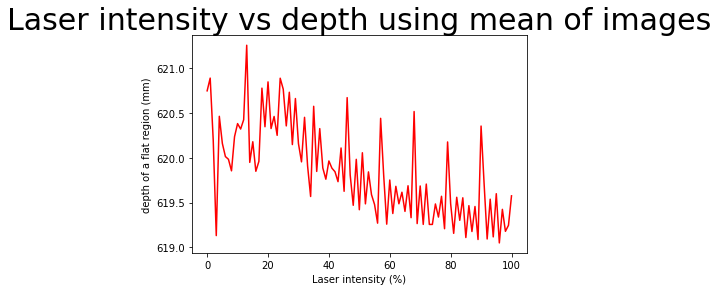

In [13]:
laser_intensity = [i for i in range(len(mean_images))]

plt.title(label="Laser intensity vs depth using mean of images",
          fontsize=30)

plt.xlabel("Laser intensity (%)") 
plt.ylabel("depth of a flat region (mm)") 

plt.plot(laser_intensity, mean_images, color="red")
plt.show()

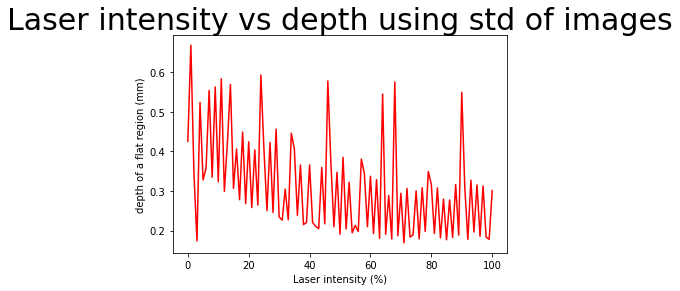

In [14]:
laser_intensity = [i for i in range(len(mean_images))]

plt.title(label="Laser intensity vs depth using std of images",
          fontsize=30)

plt.xlabel("Laser intensity (%)") 
plt.ylabel("depth of a flat region (mm)") 

plt.plot(laser_intensity, std_images, color="red")
plt.show()

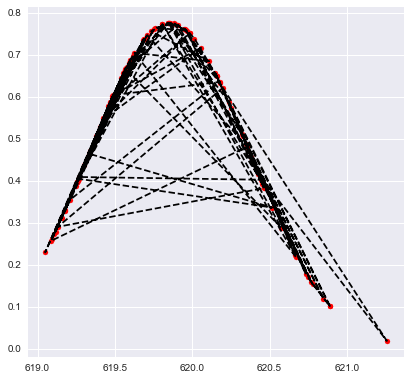

In [ ]:
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
    
x = np.asanyarray(mean_images)

y = pdf(x)# y-values using corresponding x-values



# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y, color = 'black',
         linestyle = 'dashed')
  
plt.scatter(x, y, marker = 'o',
            s = 25, color = 'red')
  
plt.show()

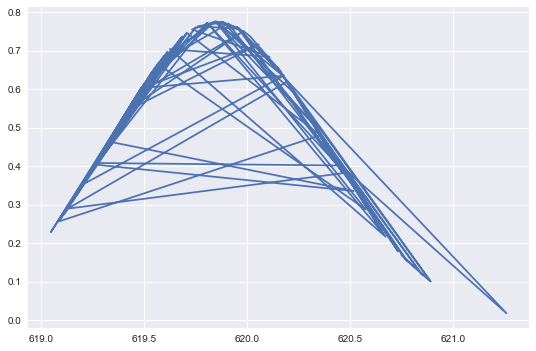

In [ ]:
plt.figure()
plt.plot(x,y)
plt.show()

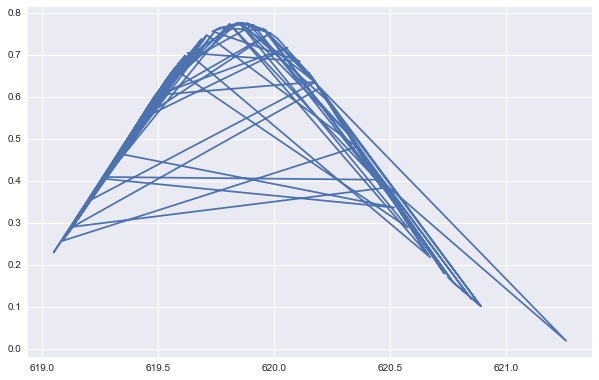

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#create range of x-values from -4 to 4 in increments of .001

mean = np.mean(x)
std = np.std(x)
#create range of y-values that correspond to normal pdf with mean=0 and sd=1 
y = norm.pdf(x,mean,std)



#define plot 
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y)

#choose plot style and display the bell curve 
plt.style.use('fivethirtyeight')
plt.show()

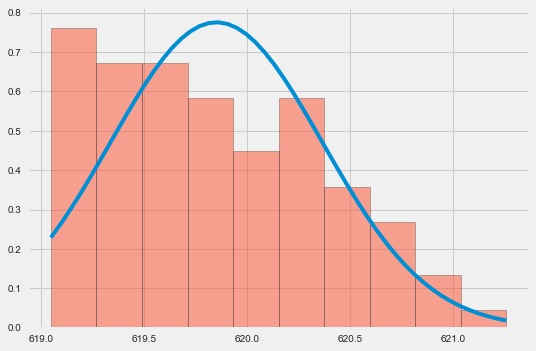

In [ ]:
domain = np.linspace(np.min(x), np.max(x))
plt.plot(domain,norm.pdf(domain,mean,std))
plt.hist(x,edgecolor = "black", alpha = .5, density = True)
plt.show()
# plt.hist(x)
# plt.show()